<a href="https://colab.research.google.com/github/Zuzed22/Machine-Learning/blob/main/IA_aumentada_previsi%C3%B3n_atrasos_de_vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- import pandas as pd
- import numpy as np
- import sklearn
- import seaborn as sns
- import yellowbrick

print(f'Versión de pandas: {pd.__version__}')

print(f'Versión de numpy: {np.__version__}')

print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')

print(f'Versión de seaborn: {sns.__version__}')

print(f'Versión de yellowbrick: {yellowbrick.__version__}')

## Leer el archivo CSV utilizando Pandas

In [161]:
import pandas as pd

datos = pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [162]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


## Estadísticas descriptivas utilizando los métodos describe y info

In [163]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [164]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [165]:
datos.describe(include= 'O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## Visualizaciones gráficas

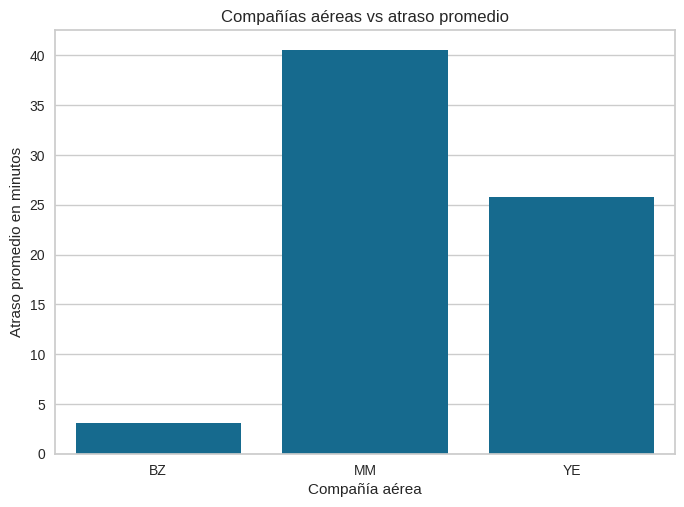

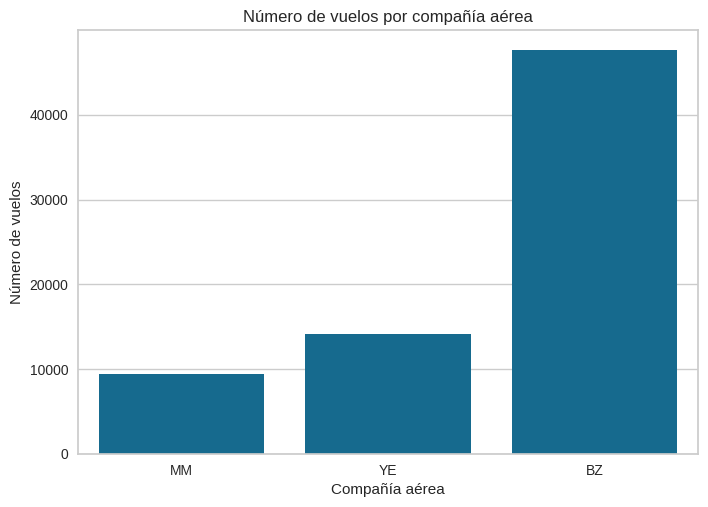

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data= avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x= 'airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

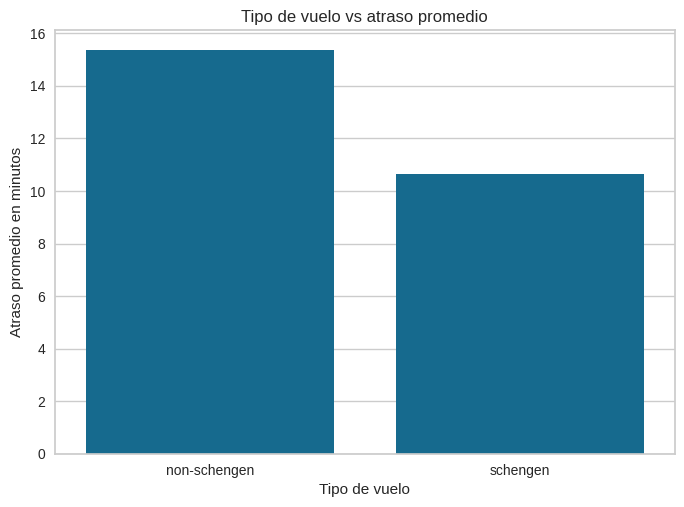

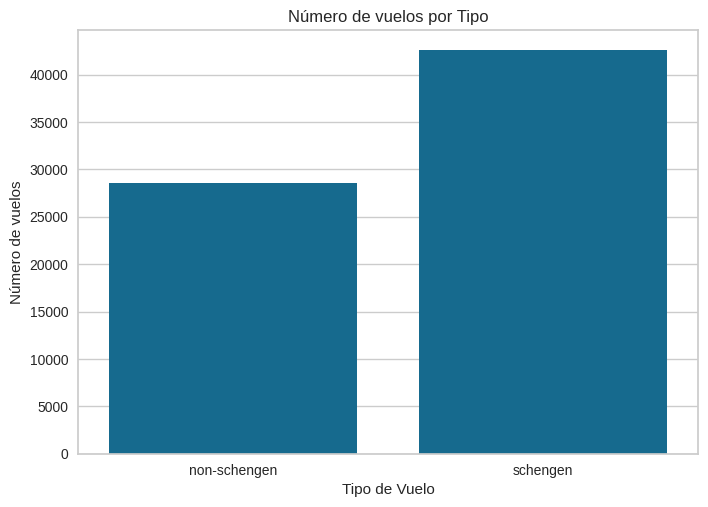

In [167]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data= avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x= 'schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

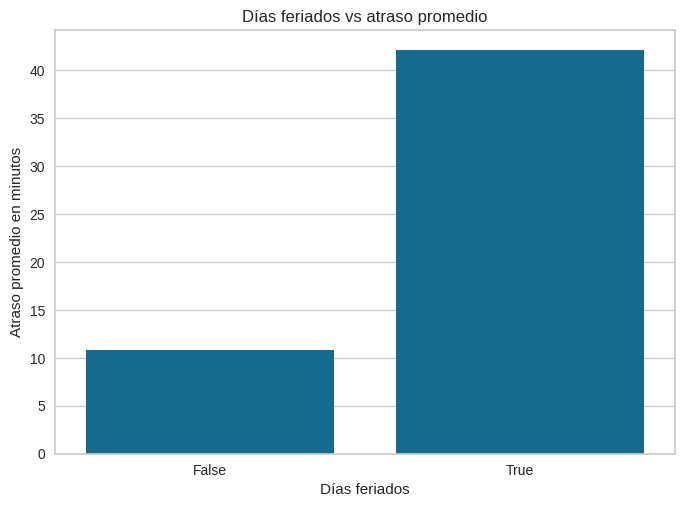

In [168]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data= avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [169]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

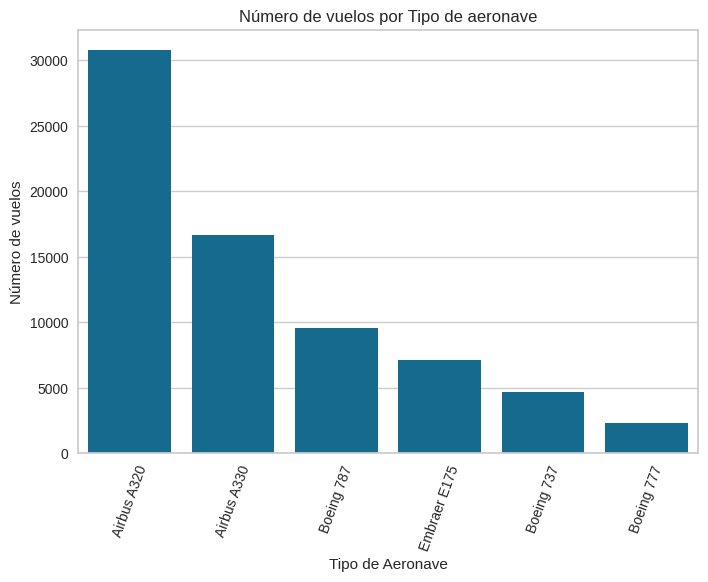

In [170]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data= datos, x= 'aircraft_type', order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

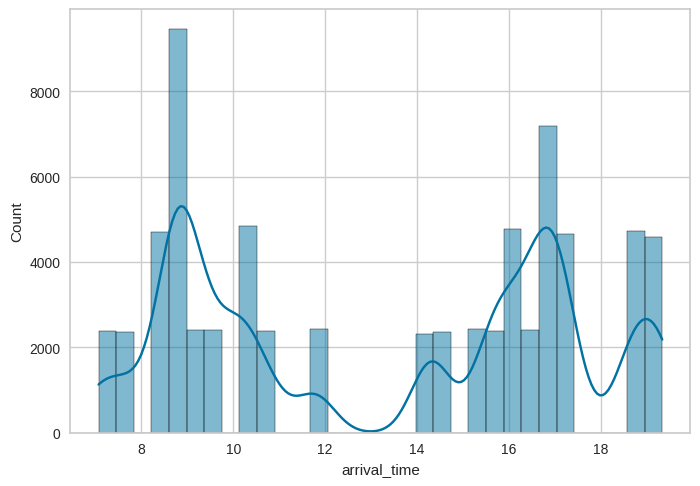

In [171]:
sns.histplot(data=datos, x='arrival_time', kde=True)

## Distribución de los datos

Es importante analizar la distribución de los datos antes de ingresarlos en un modelo de regresión para garantizar que el modelo sea apropiado para los datos. La distribución de estos puede afectar la precisión del modelo, por lo que es importante asegurarse de que los datos estén distribuidos de manera adecuada antes de realizar el análisis. Además, el análisis de la distribución de los datos puede ayudar a identificar valores atípicos y decidir cómo manejarlos antes de realizar el análisis.

El primer paso es definir un ancho para los bins. Los bins, en un histograma, son intervalos de valores que se utilizan para agrupar los datos en clases. Para definir este ancho, utilizaremos la Regla de Freedman-Diaconis que matemáticamente se define como:

La definición matemática de la Regla Freedman-Diaconis es la siguiente: del lado izquierdo de la ecuación, tenemos "anchoBin", y del lado derecho de la igualdad, tenemos "2 veces el rango intercuartílico dividido por la raíz cúbica de n"

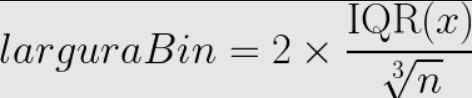

In [172]:
import numpy as np

def ancho_bin(df, columna):
 q75,q25 = np.percentile(df[columna],[75,25])
 iqr = q75 - q25
 ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
 return ancho

Ahora vamos a construir los histogramas para la hora de llegada y la hora de salida de los aviones.

<Axes: xlabel='arrival_time', ylabel='Count'>

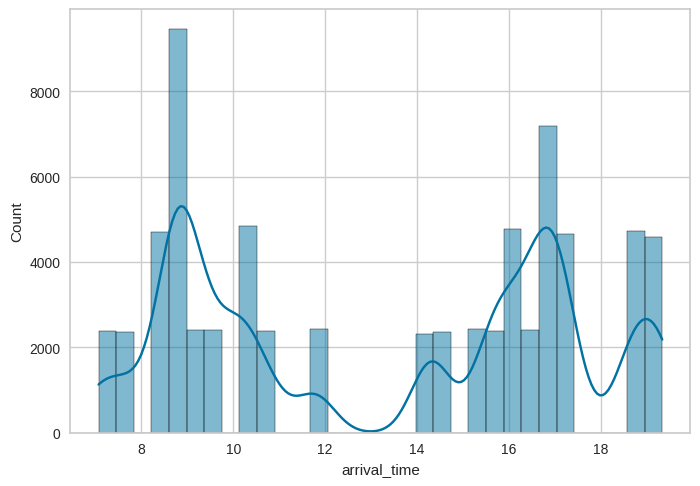

In [173]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth= binwidth)

<Axes: xlabel='arrival_time', ylabel='Count'>

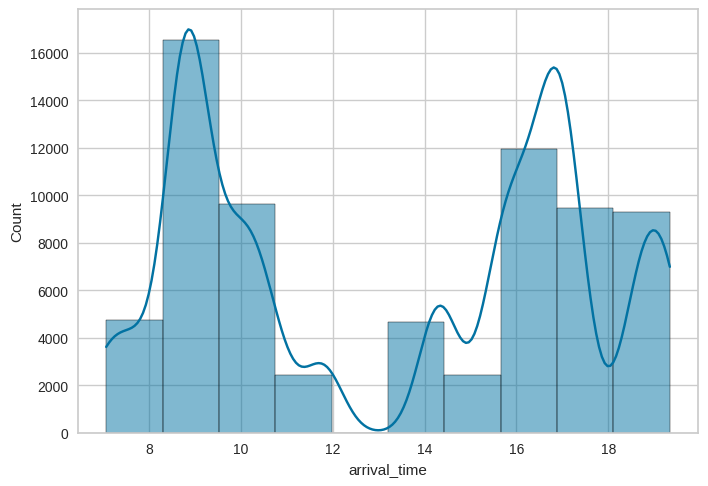

In [174]:
sns.histplot(data=datos, x='arrival_time', kde=True, bins= 10)

<Axes: xlabel='departure_time', ylabel='Count'>

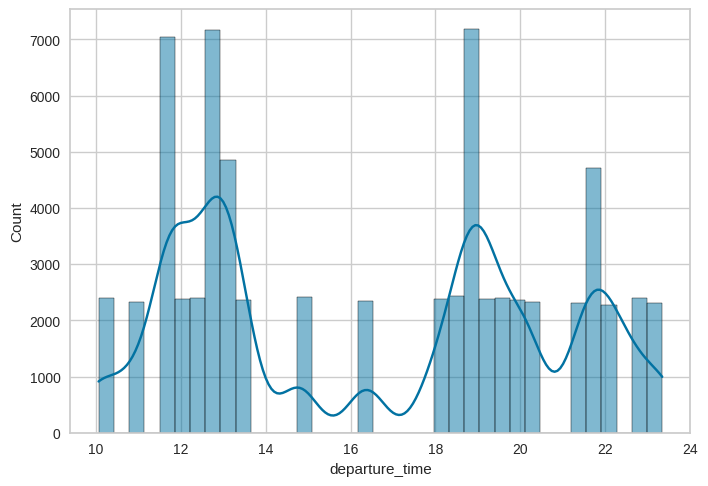

In [175]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth= binwidth)

Y por último, vamos a construir un boxplot y un histograma de la variable objetivo (delay).

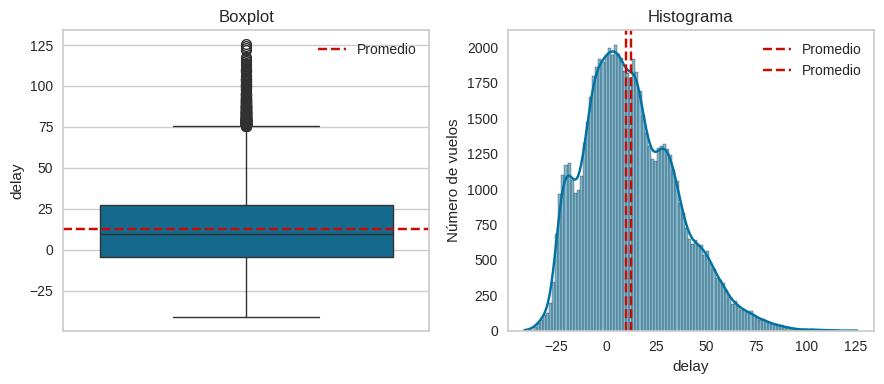

In [176]:
atraso_promedio = datos ['delay'].mean()
atraso_mediana = datos ['delay'].median()

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax= ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle= '--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde= True, binwidth= binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle= '--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='r', linestyle= '--', label='Promedio')
ax[1].legend()

plt.tight_layout()

plt.show()


In [177]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

Creación de 3 nuevas columnas para el conjunto de datos date, is_weekend y day_name:

In [178]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [179]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
29552,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,145,2015,False,-0.402269,2015-05-26,False,Tuesday
12846,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,126,2012,False,15.252639,2012-05-06,True,Sunday
67290,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,106,2022,False,-2.227404,2022-04-17,True,Sunday
47249,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,229,2018,False,-4.977103,2018-08-18,True,Saturday
66351,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,43,2022,False,-19.567038,2022-02-13,True,Sunday


In [180]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

Codificación de las variables que son categóricas, transformando las variables categóricas binarias en 0 y 1, y para las demás variables categóricas, utilizaremos el método get_dummies.

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Ensure schengen is encoded before get_dummies
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
24486,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,172,2014,0,-6.160181,2014-06-22,1,Sunday
41606,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,218,2017,0,-9.875086,2017-08-07,0,Monday
35007,5,BZ,Airbus A320,1,ZQO,9.344097,12.344097,143,2016,0,6.689300,2016-05-23,0,Monday


In [183]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [184]:
categoricas = ['airline','aircraft_type','origin','day_name']

# Apply get_dummies to the full dataset
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
38264,28,0,15.967963,17.967963,360,2016,0,-7.575596,2016-12-26,0,...,0,0,0,0,1,0,0,0,0,0
54501,11,0,10.177197,13.177197,348,2019,0,5.861939,2019-12-15,1,...,0,0,0,0,0,0,1,0,0,0
14928,1,0,15.496519,18.496519,265,2012,0,38.600261,2012-09-22,1,...,0,0,0,0,0,1,0,0,0,0
26979,24,1,9.668655,12.668655,338,2014,0,13.698577,2014-12-05,0,...,0,0,0,1,0,0,0,0,0,0
55285,30,1,8.923441,12.923441,35,2020,0,16.933366,2020-02-05,0,...,0,0,0,0,0,0,0,0,0,1


In [185]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [186]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

Limpieza de datos, eliminando las columnas 'flight_id', 'departure_time', 'day', 'year' y 'date' del conjunto de datos.

In [187]:
# Create df from the fully encoded dataset
df = datos_codificados.drop(columns= ['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
64153,0,8.794147,0,7.793650,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
29178,0,19.341235,0,11.447868,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
58542,0,16.571894,0,13.037232,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
68670,1,14.258911,0,-11.606224,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
10062,1,9.668655,0,-1.396318,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Regenerate X and y from the correctly encoded df
X = df.drop(['delay'], axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
 rmse = mean_squared_error(y_test, y_pred)
 mae = mean_absolute_error(y_test, y_pred)
 r2 = r2_score(y_test, y_pred)
 metricas = {
     'RMSE' : round(rmse**(1/2), 4),
     'MAE' : round(mae, 4),
     'R2' : round(r2, 4)
     }
 return metricas

In [190]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [191]:
from sklearn.ensemble import RandomForestRegressor

# The data is now correctly encoded before the split
modelo = RandomForestRegressor(max_depth= 5, random_state= 42)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

Selección de características

Vamos a imprimir cuáles son las características más importantes del conjunto de datos para el modelo RandomForestRegressor.

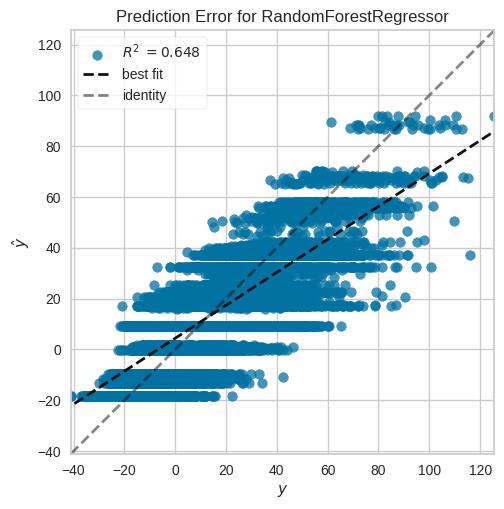

In [192]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

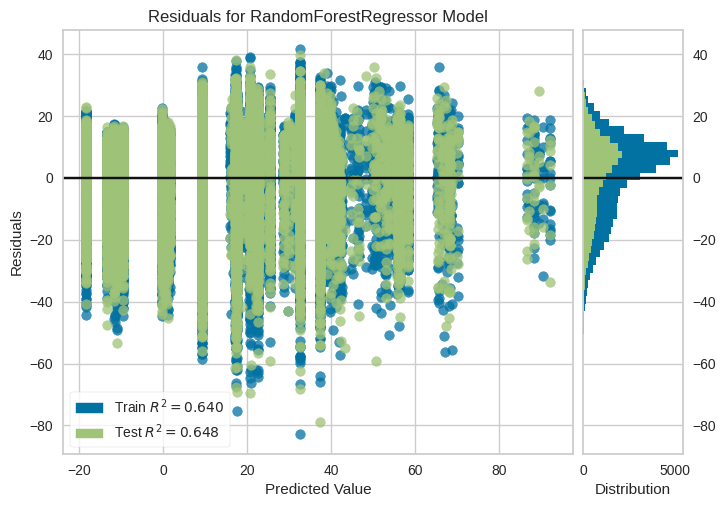

In [193]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

In [194]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2' : 'r2'
            }

cv = KFold(n_splits=5, shuffle=True, random_state= 42)
cv_results = cross_validate(modelo, X_train, y_train, scoring= scoring, cv= cv)
cv_results


{'fit_time': array([2.28882766, 2.19453907, 2.44412827, 2.58298779, 2.19178247]),
 'score_time': array([0.03968954, 0.0382998 , 0.04377532, 0.03703618, 0.03902268]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

In [195]:
len(df.columns)

31

DataFrame con las importancias de las características en el conjunto de datos.

In [196]:
importances = modelo.feature_importances_

In [197]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': (importances*100).round(2)}).sort_values('Importances', ascending= False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


Entrenamiento y evaluación del RandomForestRegressor con las características más importantes:

In [198]:
[i if i != 0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [199]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth= 5, random_state= 42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [200]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth= 5, random_state= 42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


Vamos a separar nuevamente en entrenamiento y prueba con las 13 características más importantes del conjunto de datos:

In [201]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state= 42)

Optimizando los hiperparámetros con GridSearchCV

Para realizar la optimización de hiperparámetros necesitamos definir el espacio de búsqueda que será utilizado por GridSearchCV.

In [203]:
param_grid = {
    'max_depth' : [5,10,15],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [2,4,6],
    'n_estimators' : [100,150,200]
    }

Búsqueda de los mejores hiperparámetros.

In [204]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state= 42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid= param_grid, scoring= 'r2', cv=  cv)

model_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [205]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

Evaluación el modelo optimizado utilizando la función para calcular las métricas.

In [206]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [207]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


Guardando el modelo

Por último, vamos a guardar el modelo para uso futuro.

In [208]:
import pickle

try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presento un erro al almancenar el modelo:', str(e))

Modelo serializado con éxito


# ***Utilizando el modelo guardado***

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [209]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [210]:
import pickle
import pandas as pd

try:
  with open('champion.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

  print('Modelo cargado con éxito')

  sample_df = pd.DataFrame([nueva_muestra], columns=X_selected_features.columns)

  prediccion = loaded_model.predict(sample_df)
  print(f'La predicción para la nueva muestra es: {prediccion[0]}')

except FileNotFoundError:
  print('Error: No se encontró el archivo del modelo (champion.pkl).')
except Exception as e:
  print('Se presento un error al cargar o usar el modelo:', str(e))

Modelo cargado con éxito
La predicción para la nueva muestra es: 48.73321005358915
